In [14]:
import pandas as pd
import math, copy
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
from lab_utils_uni import plt_house_x, plt_contour_wgrad, plt_divergence, plt_gradients

In [2]:
# Cargar los datos desde el archivo CSV
data = pd.read_csv('C:/Users/julio/Desktop/Proyectos/package-python-gradient-descent-1/csv initial/data.txt')
data.head()

,x,y,z
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [3]:
# Load our data set
#x_train = np.array([1.0, 2.0])   #features
#y_train = np.array([300.0, 500.0])   #target value
x_train = data['x'].values
y_train = data['z'].values

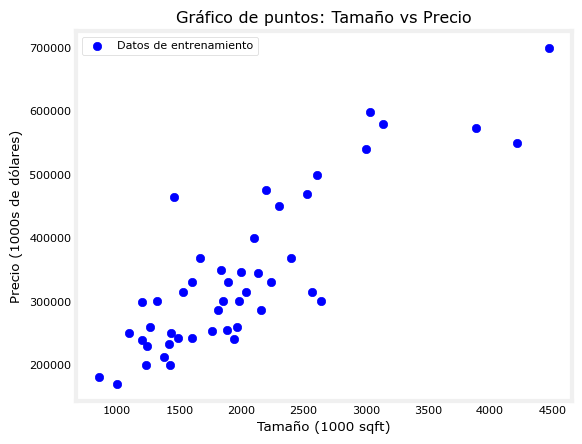

In [4]:
plt.scatter(x_train, y_train, color='blue', label='Datos de entrenamiento')
plt.title('Gráfico de puntos: Tamaño vs Precio')
plt.xlabel('Tamaño (1000 sqft)')
plt.ylabel('Precio (1000s de dólares)')
plt.legend()
plt.show()

In [6]:
#Function to calculate the cost
def compute_cost(x, y, w, b):
   
    m = x.shape[0] 
    cost = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1 / (2 * m) * cost

    return total_cost

In [7]:
def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    # Number of training examples
    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):  
        f_wb = w * x[i] + b 
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = f_wb - y[i] 
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return dj_dw, dj_db

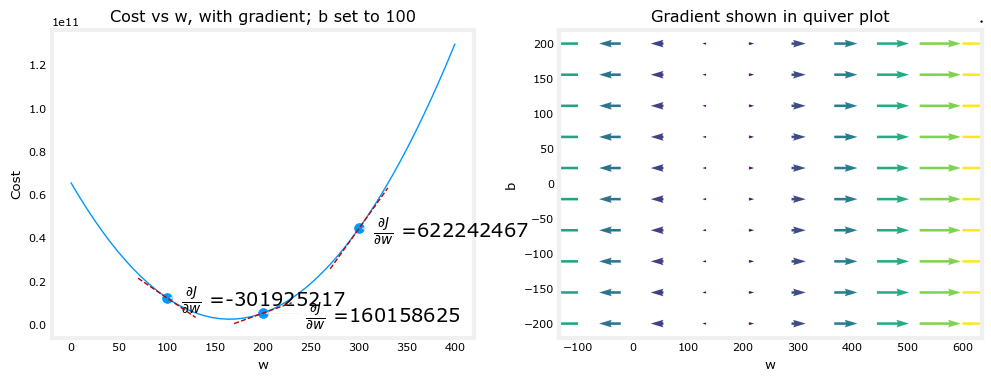

In [8]:
plt_gradients(x_train,y_train, compute_cost, compute_gradient)
plt.show()

In [9]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,))  : Data, m examples 
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters  
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient
      
    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b] 
      """
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)     

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history #return w and J,w history for graphing

In [10]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 10
tmp_alpha = 1.0e-1
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 1.35e+22  dj_dw: -7.642e+08, dj_db: -3.404e+05   w:  7.642e+07, b: 3.40413e+04
Iteration    1: Cost 2.88e+33  dj_dw:  3.531e+14, dj_db:  1.529e+11   w: -3.531e+13, b:-1.52893e+10
Iteration    2: Cost 6.15e+44  dj_dw: -1.632e+20, dj_db: -7.065e+16   w:  1.632e+19, b: 7.06494e+15
Iteration    3: Cost 1.31e+56  dj_dw:  7.540e+25, dj_db:  3.265e+22   w: -7.540e+24, b:-3.26459e+21
Iteration    4: Cost 2.80e+67  dj_dw: -3.484e+31, dj_db: -1.509e+28   w:  3.484e+30, b: 1.50851e+27
Iteration    5: Cost 5.99e+78  dj_dw:  1.610e+37, dj_db:  6.971e+33   w: -1.610e+36, b:-6.97056e+32
Iteration    6: Cost 1.28e+90  dj_dw: -7.439e+42, dj_db: -3.221e+39   w:  7.439e+41, b: 3.22098e+38
Iteration    7: Cost 2.73e+101  dj_dw:  3.438e+48, dj_db:  1.488e+45   w: -3.438e+47, b:-1.48836e+44
Iteration    8: Cost 5.83e+112  dj_dw: -1.588e+54, dj_db: -6.877e+50   w:  1.588e+53, b: 6.87745e+49
Iteration    9: Cost 1.24e+124  dj_dw:  7.340e+59, dj_db:  3.178e+56   w: -7.340e+58, b:-3.17795e+

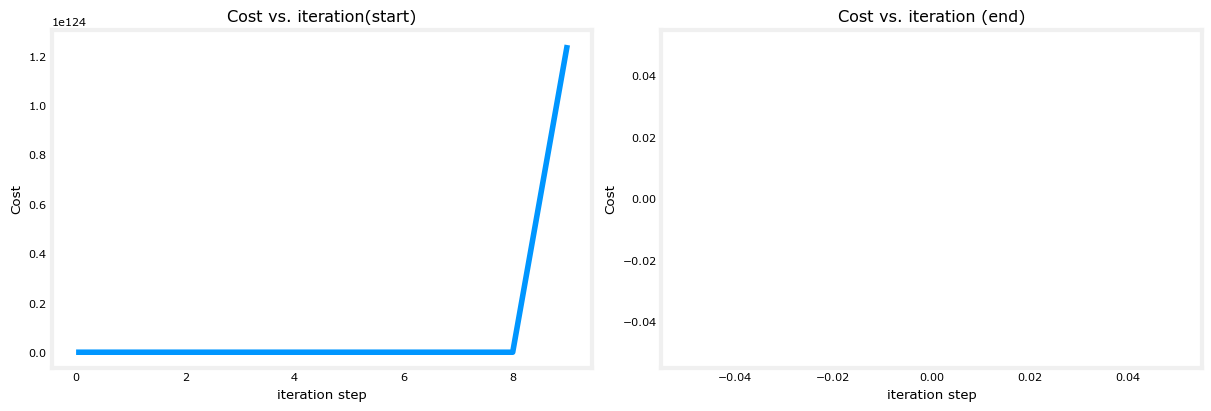

In [11]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

In [12]:
print(f"1000 sqft house prediction {w_final*1.0 + b_final:0.1f} Thousand dollars")
print(f"1200 sqft house prediction {w_final*1.2 + b_final:0.1f} Thousand dollars")
print(f"2000 sqft house prediction {w_final*2.0 + b_final:0.1f} Thousand dollars")

1000 sqft house prediction -73430857551532400691116161924764271785162381565399689854976.0 Thousand dollars
1200 sqft house prediction -88110673153209968018816183971872089270436011309147709505536.0 Thousand dollars
2000 sqft house prediction -146829935559920270780734069956238071515107939256682047078400.0 Thousand dollars


OverflowError: Python int too large to convert to C long

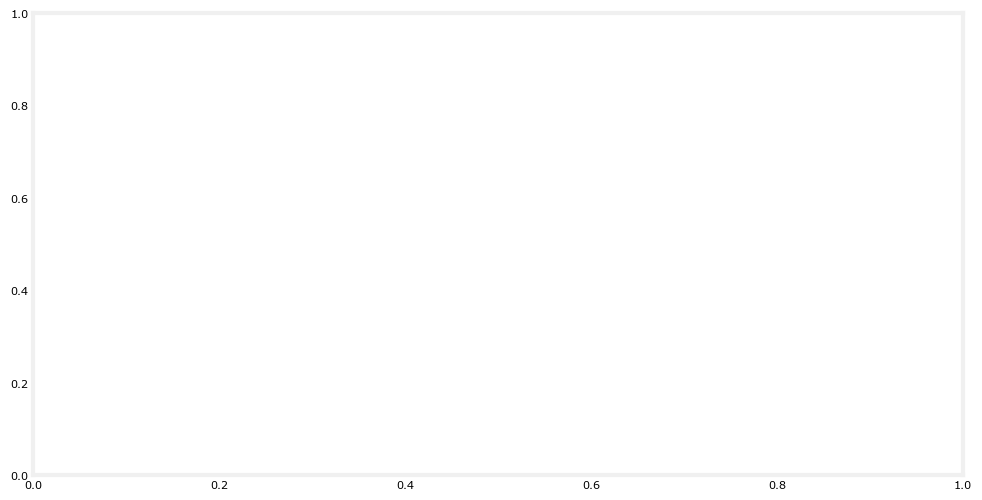

In [13]:
fig, ax = plt.subplots(1,1, figsize=(12, 6))
plt_contour_wgrad(x_train, y_train, p_hist, ax)

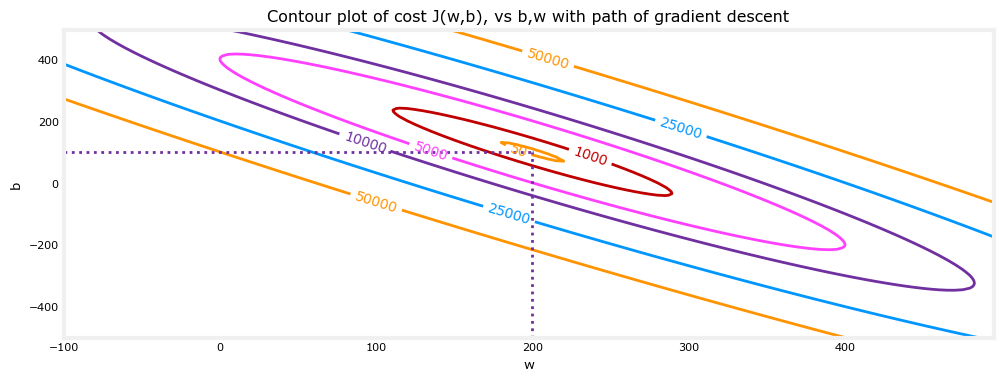

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(12, 4))
plt_contour_wgrad(x_train, y_train, p_hist, ax)

In [ ]:
# initialize parameters
w_init = 0
b_init = 0
# set alpha to a large value
iterations = 10
tmp_alpha = 8.0e-1
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)

Iteration    0: Cost 2.58e+05  dj_dw: -6.500e+02, dj_db: -4.000e+02   w:  5.200e+02, b: 3.20000e+02
Iteration    1: Cost 7.82e+05  dj_dw:  1.130e+03, dj_db:  7.000e+02   w: -3.840e+02, b:-2.40000e+02
Iteration    2: Cost 2.37e+06  dj_dw: -1.970e+03, dj_db: -1.216e+03   w:  1.192e+03, b: 7.32800e+02
Iteration    3: Cost 7.19e+06  dj_dw:  3.429e+03, dj_db:  2.121e+03   w: -1.551e+03, b:-9.63840e+02
Iteration    4: Cost 2.18e+07  dj_dw: -5.974e+03, dj_db: -3.691e+03   w:  3.228e+03, b: 1.98886e+03
Iteration    5: Cost 6.62e+07  dj_dw:  1.040e+04, dj_db:  6.431e+03   w: -5.095e+03, b:-3.15579e+03
Iteration    6: Cost 2.01e+08  dj_dw: -1.812e+04, dj_db: -1.120e+04   w:  9.402e+03, b: 5.80237e+03
Iteration    7: Cost 6.09e+08  dj_dw:  3.156e+04, dj_db:  1.950e+04   w: -1.584e+04, b:-9.80139e+03
Iteration    8: Cost 1.85e+09  dj_dw: -5.496e+04, dj_db: -3.397e+04   w:  2.813e+04, b: 1.73730e+04
Iteration    9: Cost 5.60e+09  dj_dw:  9.572e+04, dj_db:  5.916e+04   w: -4.845e+04, b:-2.99567e+04


Above, $w$ and $b$ are bouncing back and forth between positive and negative with the absolute value increasing with each iteration. Further, each iteration $\frac{\partial J(w,b)}{\partial w}$ changes sign and cost is increasing rather than decreasing. This is a clear sign that the *learning rate is too large* and the solution is diverging. 
Let's visualize this with a plot.

OverflowError: Python int too large to convert to C long

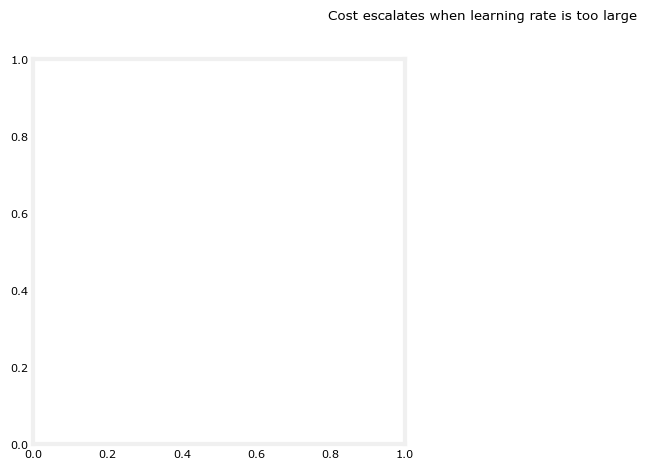

In [ ]:
plt_divergence(p_hist, J_hist,x_train, y_train)
plt.show()